In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
from datetime import datetime

In [7]:
# Import additional dependencies
from citipy import citipy

import requests

# Import linregress
from scipy.stats import linregress

# Import gmaps
import gmaps

In [8]:
# Import the OpenWeather API key from config.py
from config import weather_api_key

# Import the Google Maps API key from config.py
from config import g_key

In [9]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Avarua,CK,2022-05-21 15:16:56,-21.2078,-159.7750,73.45,83,40,3.44
1,1,Hithadhoo,MV,2022-05-21 15:18:00,-0.6000,73.0833,83.89,68,100,9.15
2,2,Hilo,US,2022-05-21 15:18:24,19.7297,-155.0900,81.28,85,100,4.61
3,3,Rikitea,PF,2022-05-21 15:16:44,-23.1203,-134.9692,74.57,74,13,5.70
4,4,Kulhudhuffushi,MV,2022-05-21 15:18:25,6.6221,73.0700,83.59,79,59,15.66


In [10]:
# Extract relevant fields from the DataFrame for plotting

latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

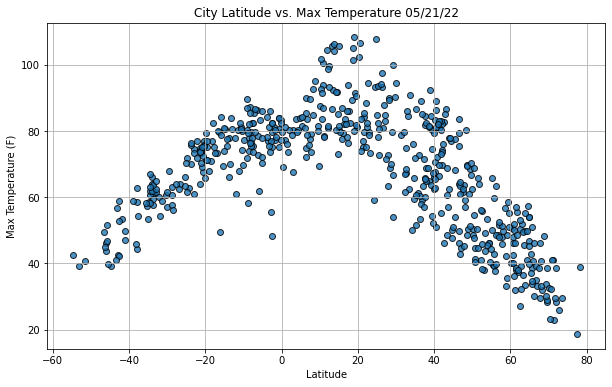

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10, 6)) # make it big

plt.scatter(latitudes,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

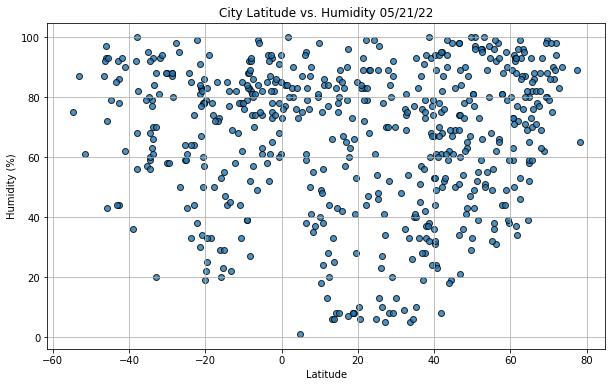

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.subplots(figsize=(10, 6)) # make it big

plt.scatter(latitudes,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

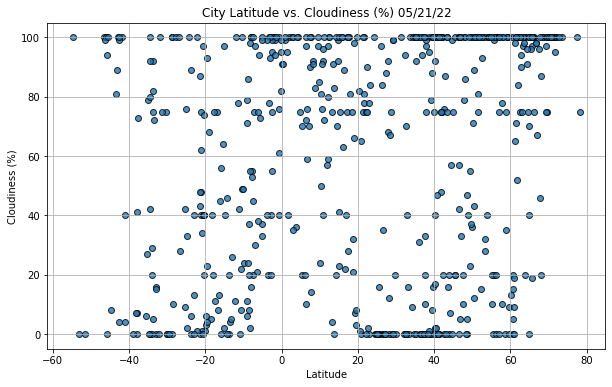

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.subplots(figsize=(10, 6)) # make it big

plt.scatter(latitudes,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

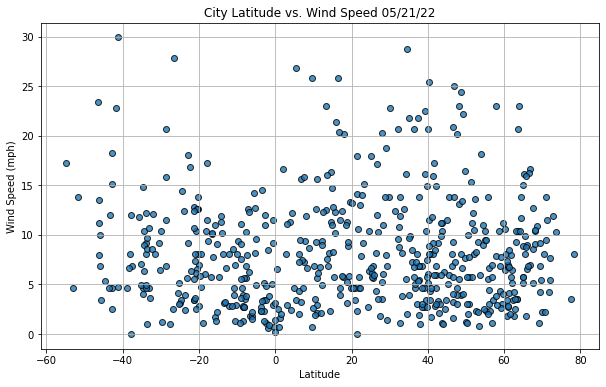

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10, 6)) # make it big
plt.scatter(latitudes,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Create a function to create a plot & perform linear regression on the weather data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

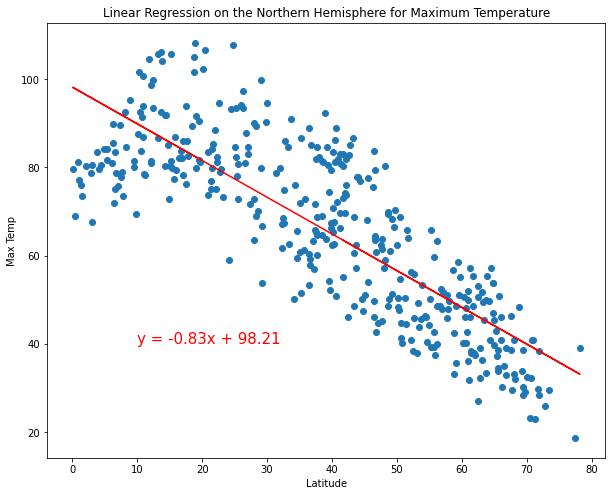

In [18]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

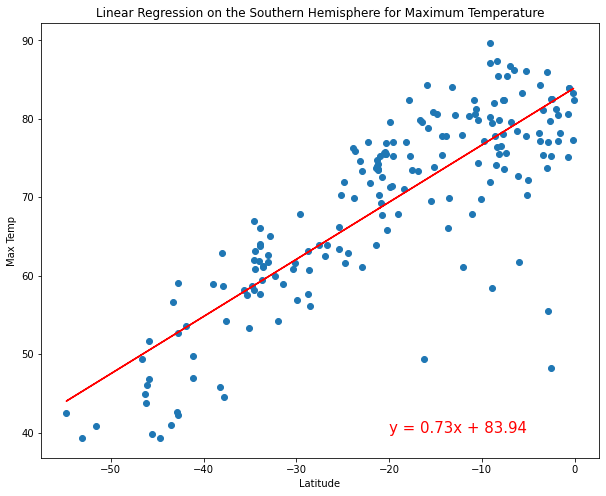

In [20]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-20,40))

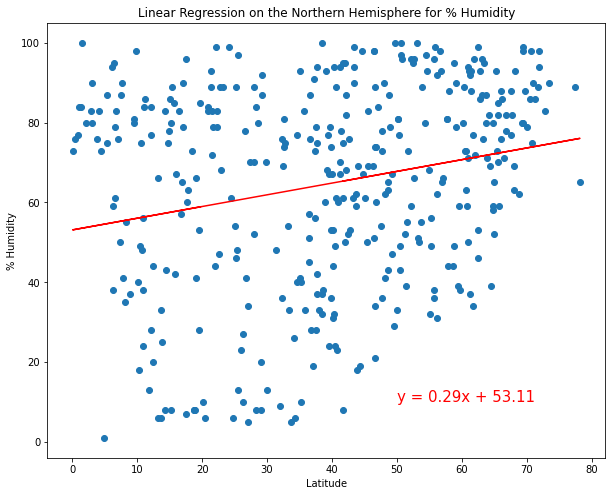

In [24]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,10))

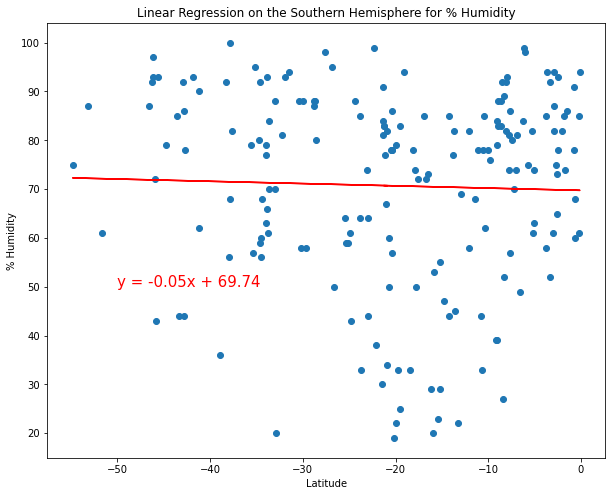

In [25]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,50))

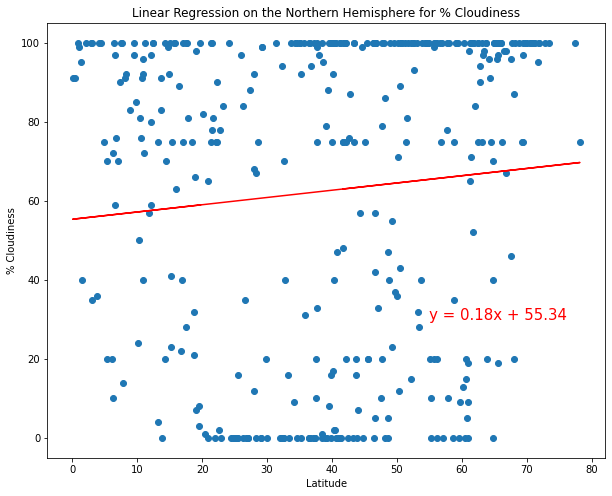

In [27]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(55,30))

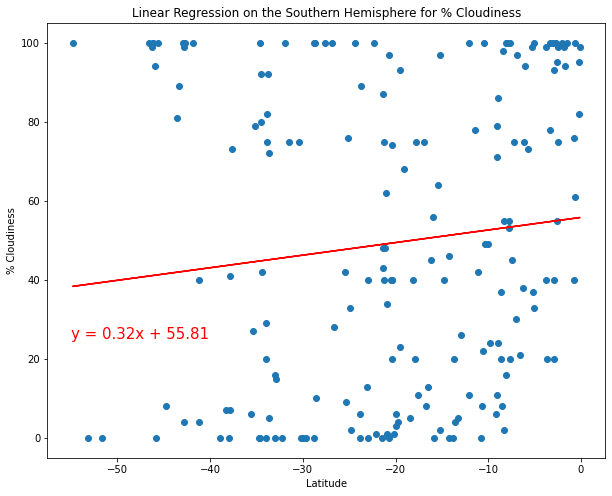

In [29]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,25))

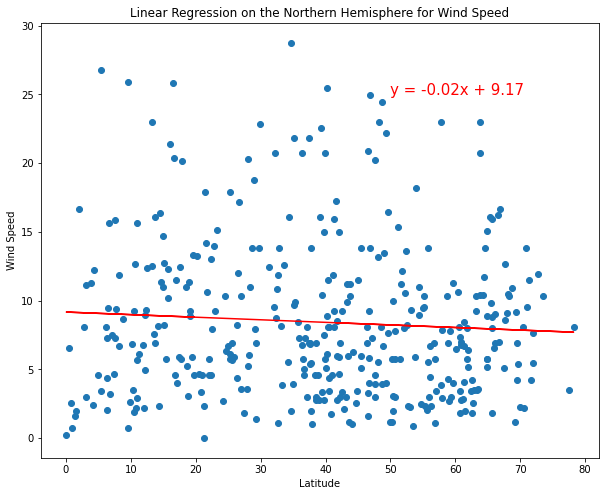

In [34]:
# Linear regression on the Northern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(50,25))

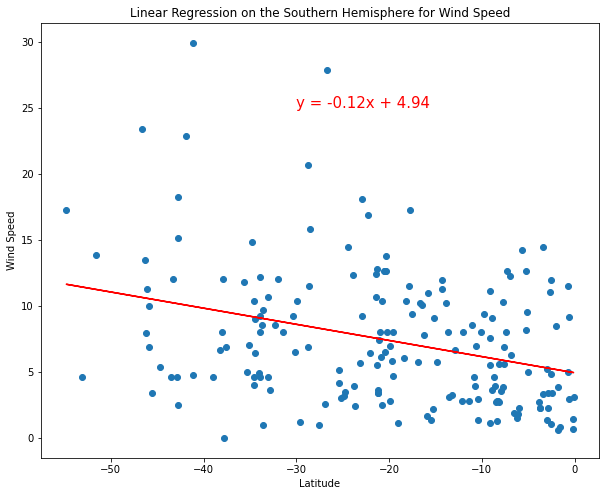

In [38]:
# Linear regression on the Southern Hemisphere
plt.figure(figsize=(10,8)) # make it bigger
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,25))

In [39]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key = g_key)

In [40]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [41]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level = 1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, 
                                 weights = [max(temp, 0) for temp in max_temp], 
                                 dissipating = False, 
                                 max_intensity = 300, 
                                 point_radius = 4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, 
                                 weights = humidity, 
                                 dissipating = False, 
                                 max_intensity = 300, 
                                 point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, 
                                 weights = clouds, 
                                 dissipating = False, 
                                 max_intensity = 300, 
                                 point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
wind_speed = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, 
                                 weights = wind_speed, 
                                 dissipating = False, 
                                 max_intensity = 300, 
                                 point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [46]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Hithadhoo,MV,2022-05-21 15:18:00,-0.6000,73.0833,83.89,68,100,9.15
2,2,Hilo,US,2022-05-21 15:18:24,19.7297,-155.0900,81.28,85,100,4.61
4,4,Kulhudhuffushi,MV,2022-05-21 15:18:25,6.6221,73.0700,83.59,79,59,15.66
8,8,Atuona,PF,2022-05-21 15:18:26,-9.8000,-139.0333,77.18,76,24,9.40
12,12,Ewa Beach,US,2022-05-21 15:17:08,21.3156,-158.0072,75.15,89,75,0.00
13,13,Mataram,ID,2022-05-21 15:18:28,-8.5833,116.1167,77.81,83,37,3.96
26,26,Bull Savanna,JM,2022-05-21 15:18:33,17.8868,-77.5902,82.51,63,81,20.18
28,28,Albany,US,2022-05-21 15:18:33,42.6001,-73.9662,82.72,76,76,3.36
33,33,Jamestown,US,2022-05-21 15:18:35,42.0970,-79.2353,82.02,68,75,14.97
34,34,Imaculada,BR,2022-05-21 15:18:36,-7.3897,-37.5092,75.58,80,45,7.99


In [48]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Hithadhoo,MV,83.89,-0.6000,73.0833,
2,Hilo,US,81.28,19.7297,-155.0900,
4,Kulhudhuffushi,MV,83.59,6.6221,73.0700,
8,Atuona,PF,77.18,-9.8000,-139.0333,
12,Ewa Beach,US,75.15,21.3156,-158.0072,
13,Mataram,ID,77.81,-8.5833,116.1167,
26,Bull Savanna,JM,82.51,17.8868,-77.5902,
28,Albany,US,82.72,42.6001,-73.9662,
33,Jamestown,US,82.02,42.0970,-79.2353,
34,Imaculada,BR,75.58,-7.3897,-37.5092,
